# Copyright : fast.ai - Jeremy Howard & Sylvain Gugger - 2020 (GPLv3)

Cellules de code et plan du notebook adaptées du livre :

[Deep Learning for Coders with fastai & PyTorch](https://github.com/fastai/fastbook) de Jeremy Howard et Sylvain Gugger.

The code in the original notebooks (and thus the code in this notebook) is covered by the GPL v3 license; see the [LICENSE file](https://github.com/fastai/fastbook/blob/master/LICENSE) for details.

## Démarrer un projet de deep learning

## Concevoir une solution utile

## Collecter des données

Pour constituer un jeu de données, nous allons simplement télécharger des images sur Internet avec Bing Image Search. 

Nous devons au préalable installer quelques librairies qui vont nous aider à manipuler le site web, télécharger les images, et les filtrer avec un petit programme Python.

Ouvrez un Terminal et exécutez les 4 commandes ci-dessous avant de continuer :

> apt-get update

> apt-get install libmagic-dev

> pip install python-magic

> pip install icrawler

In [1]:
from fastai2.vision.all import *

L'objet Config() permet de configurer l'endroit où les fichiers (données, modèles) manipulés par la librairie fastai2 sont stockés.

Les valeurs par défaut peuvent être modifiées dans un fichier situé au chemin suivant : ~/.fastai/config.yml

In [2]:
!cat  ~/.fastai/config.yml

archive_path: /storage/archive/
data_path: /storage/data/
model_path: /storage/models/
storage_path: /storage/data/
version: 2



On voit que fastai2 a été automatiquement configuré par Gradient pour stocker toutes les données et modèles dans le répertoire persistant /storage alloué à chaque utilisateur.

L'object Config() nous restitue ce paramétrage de l'environnement :

In [3]:
Config().data

Path('/storage/data')

Nous allons créer un nouveau jeu de données appelé "bears" dans ce répertoire.

In [4]:
path = Config().data/"bears"
bear_types = 'grizzly','black','teddy'

Les images d'ours seront téléchargées sur Internet depuis Bing Images Search :

https://www.bing.com/images/search?q=teddy%20bear

In [5]:
import imageutils

La ligne ci-dessus importe simplement dans le notebook le code Python contenu dans le fichier imageutils.py situé dans le même répertoire.

Python recherche ce fichier dans les répertoires enregistrés dans la variable sys.path.

Les noms de toutes les variables, fonctions définies dans ce fichier sont maintenant accessibles avec un préfixe imageutils.xxx.

In [6]:
import sys
sys.path

['/notebooks/cours-deeplearning-2020/notebooks',
 '/opt/conda/envs/fastai/lib/python37.zip',
 '/opt/conda/envs/fastai/lib/python3.7',
 '/opt/conda/envs/fastai/lib/python3.7/lib-dynload',
 '',
 '/opt/conda/envs/fastai/lib/python3.7/site-packages',
 '/opt/conda/envs/fastai/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython']

On peut voir d'où viennent chaque module, fonction ou classe définis dans un notebook de la manière suivante :

In [12]:
imageutils?

In [14]:
Config?

On peut même voir le code de chacun de ces éléments de la manière suivante :

In [15]:
Config??

Pour les fonctions et classes de la librairie fastai2, on peut également visualiser la documentation :

In [18]:
doc(Config)

Une assistance est disponible au cours de la saisie de code (exploration guidée) :

> imageutils. [Tab] => liste des fonctions disponibles

> imageutils.image_download( [Shift]+[Tab] (2x) => liste des paramètres disponibles

In [ ]:
imageutils.

Il y a beaucoup d'échecs lorsqu'on essaie de télécharger les images référencées par Bing (pages disparues, protégées ...).

Pour être sûr de récupérer au moins 500 images de chaque classe d'ours, il faut tenter environ 1000 téléchargements.

In [7]:
if not path.exists():
    path.mkdir()
    for bear_type in bear_types:
        imageutils.image_download(f'{bear_type} bear', 1000, bear_type, "bing", path)

Vérifions le nombre d'images récupérées pour chaque catégorie :

In [8]:
get_image_files(path/"grizzly"),get_image_files(path/"black"),get_image_files(path/"teddy")

((#496) [Path('/storage/data/bears/grizzly/000145.jpg'),Path('/storage/data/bears/grizzly/000007.jpg'),Path('/storage/data/bears/grizzly/000430.jpg'),Path('/storage/data/bears/grizzly/000333.jpg'),Path('/storage/data/bears/grizzly/000514.jpg'),Path('/storage/data/bears/grizzly/000067.jpg'),Path('/storage/data/bears/grizzly/000196.jpg'),Path('/storage/data/bears/grizzly/000005.jpg'),Path('/storage/data/bears/grizzly/000294.jpg'),Path('/storage/data/bears/grizzly/000345.jpg')...],
 (#497) [Path('/storage/data/bears/black/000145.jpg'),Path('/storage/data/bears/black/000007.jpg'),Path('/storage/data/bears/black/000430.jpg'),Path('/storage/data/bears/black/000333.jpg'),Path('/storage/data/bears/black/000514.jpg'),Path('/storage/data/bears/black/000067.jpg'),Path('/storage/data/bears/black/000005.jpg'),Path('/storage/data/bears/black/000294.jpg'),Path('/storage/data/bears/black/000345.jpg'),Path('/storage/data/bears/black/000491.jpg')...],
 (#836) [Path('/storage/data/bears/teddy/000145.jpg'

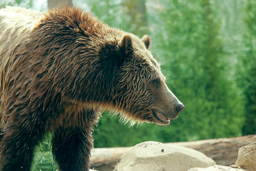

In [9]:
im = Image.open(get_image_files(path/"grizzly")[3])
im.to_thumb(256,256)

## Charger les données en mémoire : DataLoaders

In [10]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [11]:
image_files = get_image_files(path)
image_files

(#1829) [Path('/storage/data/bears/grizzly/000145.jpg'),Path('/storage/data/bears/grizzly/000007.jpg'),Path('/storage/data/bears/grizzly/000430.jpg'),Path('/storage/data/bears/grizzly/000333.jpg'),Path('/storage/data/bears/grizzly/000514.jpg'),Path('/storage/data/bears/grizzly/000067.jpg'),Path('/storage/data/bears/grizzly/000196.jpg'),Path('/storage/data/bears/grizzly/000005.jpg'),Path('/storage/data/bears/grizzly/000294.jpg'),Path('/storage/data/bears/grizzly/000345.jpg')...]

In [12]:
parent_label(image_files[0])

'grizzly'

In [13]:
dls = bears.dataloaders(path)

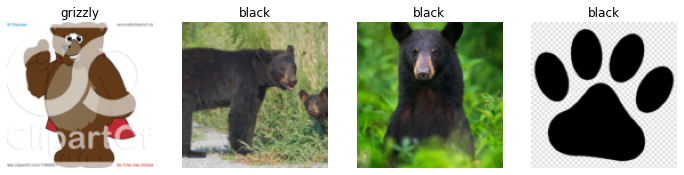

In [30]:
dls.valid.show_batch(max_n=4, nrows=1)

On voit qu'il va nous falloir "nettoyer" le jeu de données ...

Mais on ne va pas le faire tout de suite : entrainons d'abord un premier modèle pour nous aider dans cette tâche.

## Redimensionnement : presizing

Pour pouvoir effectuer un maximum d'opérations de manière massivement parallèle sur le GPU, la première étape consiste à redimensionner toutes les images du jeu de données à la même taille.

ResizeMethod.Squish change le ratio largeur/hauteur et ne produit pas des images réalistes :

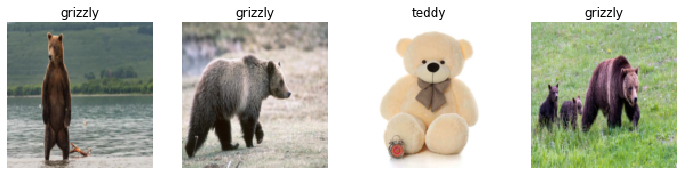

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

ResizeMethod.Pad ajoute des bandes noires qui vont perturber l'apprentissage :

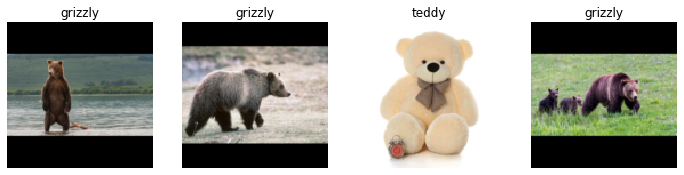

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

RandomResizedCrop (qui sera expliqué dans une prochaine leçon) permet d'éviter ces deux écueils :

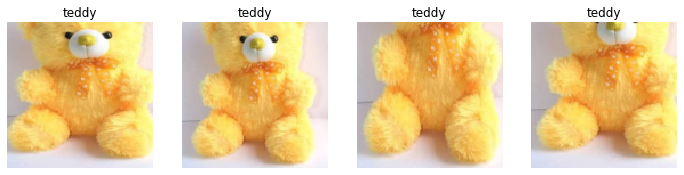

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

## Data augmentation

Une même image d'ours à laquelle on applique un léger zoom, une légère translation, rotation, etc ... reste toujours une image d'ours, mais c'est un exemple totalement différent pour un réseau de neurones.

On peut donc augmenter artificiellement la taille d'un jeu de données d'entrainement de manière considérable en lui appliquant toutes sortes de transformations de manière aléatoire.

Après avoir redimensionné individuellement chaque image à la même taille sur le CPU, ces transformations peuvent être appliquées en parallèle et en une fois à toute une série d'images sur le GPU :
- de manière beaucoup plus efficace
- en préservant une meilleure qualité d'image (par rapport à une application séquentielle l'une derrière l'autre)

Exemple des transformations aléatoires appliquées par défaut sur l'une des images.

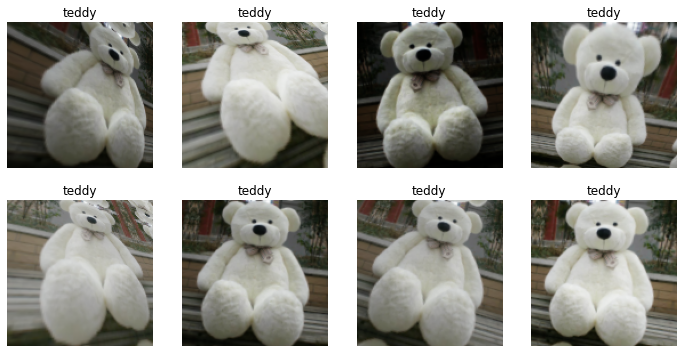

In [14]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Entrainer un premier modèle

In [51]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [52]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.696838,0.142325,0.037975,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.201505,0.124682,0.030741,00:20
1,0.163734,0.126775,0.030741,00:23
2,0.128054,0.119041,0.025316,00:21
3,0.109025,0.123976,0.025316,00:21


## Utiliser ce premier modèle pour nettoyer vos données

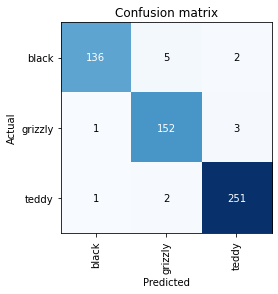

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

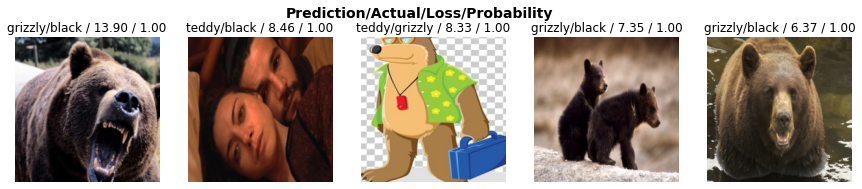

In [54]:
interp.plot_top_losses(5, nrows=1)

In [57]:
from fastai2.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner

Le widget ci-dessus ne fait qu'enregistrer les images à supprimer ou moidifier, il faut ensuite exécuter ces opérations :

In [61]:
f"{'ours'}_{cleaner.fns[0].name}"

'ours_000468.jpg'

In [67]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat/f"{cat}_{cleaner.fns[idx].name}")

## Réentrainer le modèle après nettoyage du jeu de données

In [16]:
dls = bears.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.910597,0.176341,0.060219,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.332640,0.126935,0.043796,00:18
1,0.335943,0.108962,0.040146,00:17
2,0.286777,0.106159,0.034672,00:18
3,0.234834,0.102840,0.031022,00:17
4,0.201496,0.122979,0.036496,00:16
5,0.182276,0.133173,0.038321,00:16
6,0.173804,0.125745,0.029197,00:18
7,0.146978,0.121756,0.031022,00:17


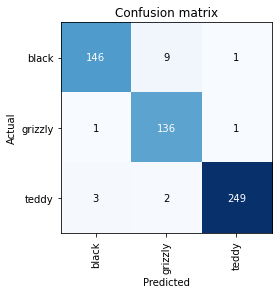

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

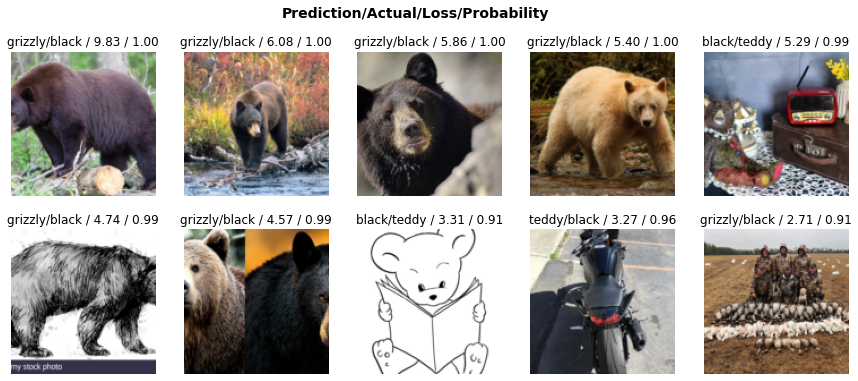

In [18]:
interp.plot_top_losses(10, nrows=2)

On voit qu'il faudrait encore faire une passe de nettoyage ....

## Convertir votre modèle en une application en ligne

### Sauvegarder le modèle entrainé

In [53]:
learn.export("bears.pkl")

In [56]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('bears.pkl')]

Taille du modèle sauvegardé sur disque : 54 Mo

In [57]:
!ls -l *.pkl

-rw-r--r-- 1 root root 54129879 Apr 11 08:34 bears.pkl


### Utiliser le modèle entrainé pour faire des prédictions (inférence)

In [58]:
learn_inf = load_learner(path/'bears.pkl')

In [26]:
dataset_path = Config().data/"bears"
bear_image_path = get_image_files(dataset_path/"grizzly")[3]

In [27]:
learn_inf.predict(bear_image_path)

('grizzly', tensor(1), tensor([1.9320e-08, 1.0000e+00, 8.7134e-12]))

In [28]:
learn_inf.dls.vocab

(#3) ['black','grizzly','teddy']

### Tester votre modèle : créer une application web à partir d'un Notebook

Un notebook Jupyter contenant des widgets peut être transformé en une application web simplifiée à l'aide du package Python [Voilà](https://blog.jupyter.org/and-voil%C3%A0-f6a2c08a4a93).

1. Ouvrez un Terminal et exécutez les commandes ci-dessous :

> pip install voila


> jupyter serverextension enable voila --sys-prefix

2. Créez un notebook ne contenant que le code et les widgets utiles pour tester le modèle (voir bearsUI.ipynb) :

In [76]:
from fastai2.vision.all import *
from fastai2.vision.widgets import *

learn_inf = load_learner(Path()/'bears.pkl')

btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()
btn_run = widgets.Button(description='Classify')

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prédiction: {pred}; Probabilité: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

VBox([widgets.Label("Sélectionnez une image d'ours :"), 
      btn_upload, btn_run, out_pl, lbl_pred])

3. Dans la zone adresse de votre naviugateur, modifiez la section /notebooks/ de l'URL de ce notebook sur le serveur Jupyter par /voila/render/ :


- avant : https://yourserver/notebooks/cours-deeplearning-2020/notebooks/bearsUI.ipynb
- après : https://yourserver/voila/render/cours-deeplearning-2020/notebooks/bearsUI.ipynb

Vous pouvez aussi simplement utiliser la commande suivante dans un Terminal :

> voila bearsUI.ipynb

4. Cette page web peut être déployée gratuitement sur Internet en quelques clics avec le site [Binder](https://mybinder.org/) :


- 

## Déployer votre application en production

### Créer un service HTTP avec FastAPI

Ouvrez un Terminal et exécutez les 3 commandes ci-dessous avant de continuer :

> pip install fastapi

> pip install uvicorn

> pip install python-multipart

1. Packager notre classifier d'ours sous forme d'une classe facile à réutiliser :

In [66]:
from fastai2.vision.all import *

class BearClassifier:
    
    def __init__(self, model_path):
        self.learn_inf = load_learner(model_path)
        
    def predict(self, image_file):
        img = PILImage.create(image_file)
        pred,pred_idx,probs = self.learn_inf.predict(img)
        return pred,probs[pred_idx].item()

Enregistrer ce morceau de code dans un fichier "bears.py" dans le même répertoire.

Il devient un module importable comme dans l'exemple ci-dessous.

In [70]:
# Unit test
import bears

model_path = Path()/"bears.pkl"
bc = bears.BearClassifier(model_path)

image_file = open(bear_image_path,"rb")
bc.predict(image_file)

('grizzly', 1.0)

2. Exposer ce classifier pour des appels externes sous forme d'un service HTTP :

In [ ]:
from fastapi import FastAPI, File, UploadFile
from pathlib import Path
from bears import BearClassifier

app = FastAPI()

model_path = Path()/"bears.pkl"
bc = BearClassifier(model_path)

@app.post("/bear/")
def predict_bear(file: UploadFile = File(...)):
    return bc.predict(file.file)

Enregistrer ce morceau de code dans un fichier "bearsapi.py" dans le même répertoire.

Il permet d'exposer notre classifier sous forme d'API avec la commande suivante :

> uvicorn bearsapi:app


`
INFO:     Started server process [472]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
`

Pour tester (*impossible dans Gardient Notebooks*) :
- ouvrir l'URL : http://127.0.0.1:8000/docs
- cliquer sur le point d'entrée : POST /bear/ Predict Bear
- cliquer sur le bouton "Try it out"
- choisir un fichier image pour le paramètre "file"
- cliquer sur le bouton "Exécuter"

Vérifier que le le résultat est correct : 
- code 200
- réponse Json : ["grizzly",0.9999934434890747]

### Créer une image de container avec Docker

### Déployer le container en production avec Google Cloud Run

## Comment éviter la catastrophe après déploiement ?